In [3]:
from google.colab import files
a = files.upload()

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv("train.txt", header = None,sep=';',names=['Input','Sentiment'],encoding='utf-8')
df_train.head()
df_train['Input'][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [6]:
df_test = pd.read_csv('test.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')
df_test.head()
len(df_train['Sentiment'])

16000

In [7]:
import numpy as np
np.unique(df_train['Sentiment'])

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [8]:
df_train['Sentiment'].replace('anger',0,inplace=True)
df_train['Sentiment'].replace('fear',1,inplace=True)
df_train['Sentiment'].replace('joy',2,inplace=True)
df_train['Sentiment'].replace('love',3,inplace=True)
df_train['Sentiment'].replace('sadness',4,inplace=True)
df_train['Sentiment'].replace('surprise',5,inplace=True)

In [9]:
df_train.head(15)

,Input,Sentiment
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
5,ive been feeling a little burdened lately wasn...,4
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,1
8,i have been with petronas for years i feel tha...,2
9,i feel romantic too,3


In [10]:
np.unique(df_train['Sentiment'])

array([0, 1, 2, 3, 4, 5])

In [11]:
import seaborn as sns

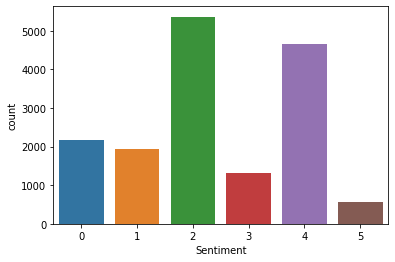

In [12]:
sns.countplot(x='Sentiment',data=df_train)

In [13]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

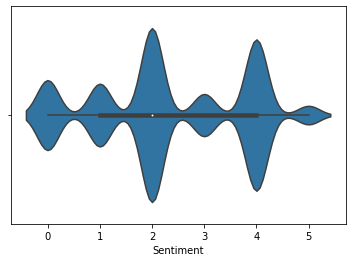

In [14]:
sns.violinplot(x='Sentiment',data=df_train)

# Data Preprocessing

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [16]:
df_train.describe()

,Sentiment
count,16000.000000
mean,2.381063
std,1.444121
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [17]:
df_train.shape

(16000, 2)

# Spliting Input and Output

In [18]:
x = df_train['Input'] # input
y = df_train['Sentiment'] # output

In [19]:
x.head()

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: Input, dtype: object

In [20]:
y.head() # MultiDimension Array

0    4
1    4
2    0
3    3
4    0
Name: Sentiment, dtype: int64

In [21]:
# Convert Single Dimensional Array
y = np.array(y)
y

array([4, 4, 0, ..., 2, 0, 4])

# Converting the Text into Integer

In [22]:
print(x.shape,y.shape)

(16000,) (16000,)


In [23]:
message = x.copy()
voc_size = 10000

In [24]:
message[0]

'i didnt feel humiliated'

In [25]:
import re
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0,len(message)):
  review = re.sub('[^a-zA-Z]',' ',message[i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [28]:
corpus[0]

'didnt feel humili'

In [29]:
from tensorflow import keras
from keras_preprocessing.text import one_hot

In [35]:
one_hot_representation = [one_hot(words,voc_size) for words in corpus]

In [36]:
one_hot_representation[0]

[8422, 5988, 9250]

In [38]:
from keras.preprocessing.sequence import pad_sequences

In [39]:
sent_length = 20
embedded_doc = pad_sequences(one_hot_representation,padding='pre',maxlen=sent_length) #'pre' or 'post'

In [40]:
embedded_doc[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 8422, 5988, 9250], dtype=int32)

In [41]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional

# Creating Model

In [42]:
dimension = 40
model =Sequential()
model.add(Embedding(voc_size,dimension,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='relu'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


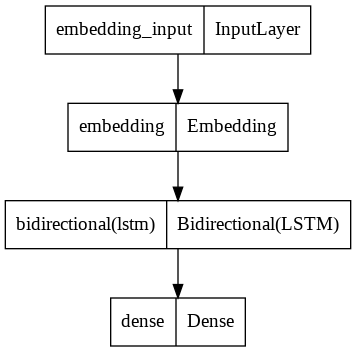

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [44]:
final_input = np.array(embedded_doc)
final_output = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_input, final_output, test_size=0.33, random_state=42)

In [46]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12,batch_size=32)

Epoch 1/12
335/335 [==============================] - 20s 42ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 2/12
335/335 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 3/12
335/335 [==============================] - 12s 37ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 4/12
335/335 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 5/12
335/335 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 6/12
335/335 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 7/12
335/335 [==============================] - 11s 34ms/step - loss: nan - accuracy: 0.1394 - val_loss: nan - val_accuracy: 0.1259
Epoch 8/12
335/335 [==============

In [49]:
def suicide_avoider(x):
  ps=PorterStemmer()
  corpus=[]
  review=re.sub('[^a-zA-Z]',' ',x)
  review=review.lower()
  review=review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)


  voc_size = 5000
  one_hot_r = [one_hot(word,voc_size) for word in corpus]

  max_length = 20
  embedded_docs = pad_sequences(one_hot_r,max_length,padding='pre')

  dimension = 40
  model = Sequential()
  model.add(Embedding(voc_size,dimension,input_length=max_length))
  model.add(Bidirectional(LSTM(100)))
  model.add(Dense(1,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
  prediction= model.predict(np.array(embedded_docs))
  if prediction.all() ==0:
    print("person is angry")
  elif prediction.all() ==1:
    print("person is in fear")
  elif prediction.all() ==2:
    print("person is in joy")
  elif prediction.all() ==3:
    print("person is in love")
  elif prediction.all() ==4:
    print("person is sad")
  else:
    print("person is surprise")
x = str(input())
suicide_avoider(x)

1
person is in fear


In [51]:
model.save("suicide.h5")